In [1]:
from pathlib import Path
import os

from hyperct import Complex
from ddgclib._curvatures import * #plot_surface#, curvature
from ddgclib._curvatures import b_curvatures_hn_ij_c_ij
from data.data_levelset_geometric_shapes.extract_and_process_interface_points import read_data



In [2]:
filename = Path("../../ddgclib/data_levelset_geometric_shapes/sphere_coarse/extraction_data_0.000000.txt")
result_folder = Path("../../ddgclib/data_levelset_geometric_shapes/X_intersections_sphere_coarse")
plot_single_cells = False

# Create the result folder
if not os.path.exists(result_folder):
    os.mkdir(result_folder)

In [3]:
# Read and plot the data
corners_and_intersections = read_data(filename)
#unique_intersections = extract_and_save_unique_intersection_points(corners_and_intersections, result_folder)
#plot_and_save_levelset_points(corners_and_intersections, result_folder)
#plot_unique_intersections(unique_intersections, result_folder)
#plot_intersection_points(corners_and_intersections, result_folder, plot_single_cells)

Total number of cells          :  128
Total number of intersections  :  504
Total number of levelset points:  128


# Pseudo-triangulation algorithm


In [21]:
X = []
HC = Complex(3)
for c in corners_and_intersections:
    cm = np.sum(c['Intersections'], axis=0) / c['Intersections'].shape[0]
    vc = HC.V[tuple(cm)]
    for xi in c['Intersections']:
        vi = HC.V[tuple(xi)]
        vi.connect(vc)
        for xj in c['Intersections']:
            vj = HC.V[tuple(xi)]
            vi.connect(vj)
        X.append(xi)
        
X = np.array(X)

In [6]:
X = []
HC = Complex(3)
for c in corners_and_intersections:
    cm = np.sum(c['Intersections'], axis=0) / c['Intersections'].shape[0]
    vc = HC.V[tuple(cm)]
    for xi in c['Intersections']:
        vi = HC.V[tuple(xi)]
        vi.connect(vc)
        for xj in c['Intersections']:
            vj = HC.V[tuple(xi)]
            vi.connect(vj)
        X.append(xi)
        
X = np.array(X)



In [10]:
import copy

hcv = copy.copy(HC.V)
for v in hcv:
    if v.x_a[0] > 0.5:
        HC.V.remove(v)

<IPython.core.display.Javascript object>


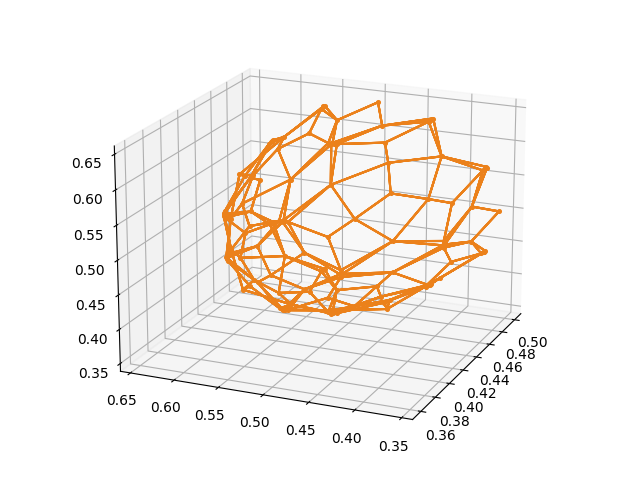

(<Figure size 640x480 with 1 Axes>, <Axes3D:>, None, None)

In [11]:
%matplotlib notebook
HC.plot_complex()

<IPython.core.display.Javascript object>


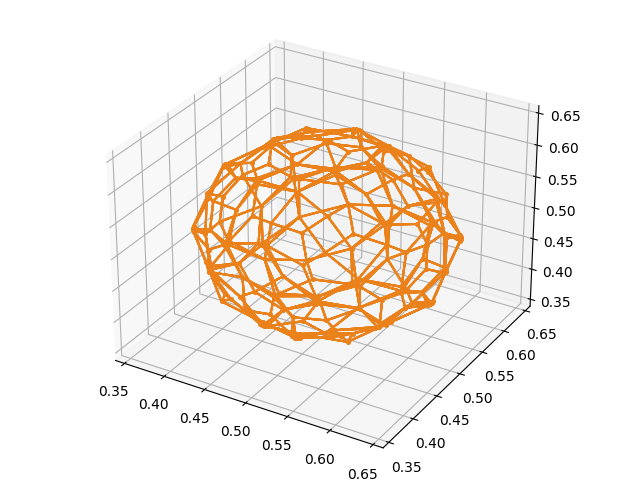

(<Figure size 640x480 with 1 Axes>, <Axes3D:>, None, None)

In [12]:
X = []
HC = Complex(3)
for c in corners_and_intersections:
    cm = np.sum(c['Intersections'], axis=0) / c['Intersections'].shape[0]
    vc = HC.V[tuple(cm)]
    for xi in c['Intersections']:
        vi = HC.V[tuple(xi)]
        vi.connect(vc)
        for xj in c['Intersections']:
            vj = HC.V[tuple(xi)]
            #vi.connect(vj)
        X.append(xi)
        
X = np.array(X)

HC.plot_complex()

<IPython.core.display.Javascript object>


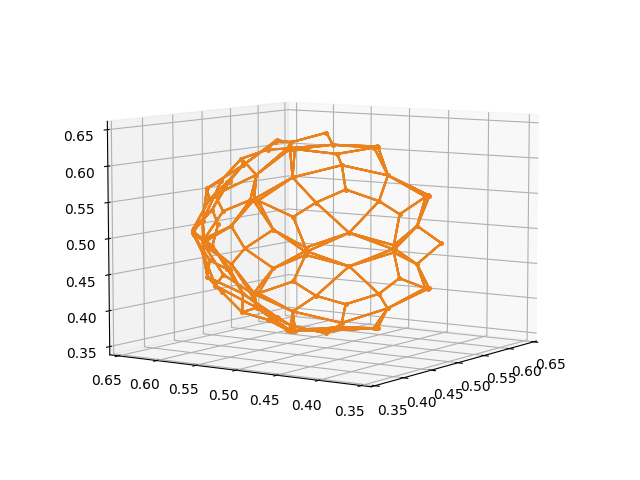

(0.35, 0.65)

In [17]:
X = []
HC = Complex(3)
for c in corners_and_intersections:
    cm = np.sum(c['Intersections'], axis=0) / c['Intersections'].shape[0]
    vc = HC.V[tuple(cm)]
    for xi in c['Intersections']:
        vi = HC.V[tuple(xi)]
        vi.connect(vc)
        for xj in c['Intersections']:
            vj = HC.V[tuple(xi)]
            #vi.connect(vj)
        X.append(xi)
        
X = np.array(X)
hcv = copy.copy(HC.V)
for v in hcv:
    if v.x_a[0] > 0.5:
        HC.V.remove(v)

fig, axes, _, _ = HC.plot_complex()
axes.axes.set_xlim3d(left=0.35, right=0.65)

# Loop to handle triangulations for all possibilities

Salavage code for only 3 and 4 vertices:

In [19]:
def cell_con(cells, dim=3, cdist=1e-14):
    HC = Complex(dim)
    cell_centres = [] # needed to complete the trianbulation
    for x_cell in cells:
        print(x_cell)
        # Case of only 3 points:
        if x_cell.shape[0] == 3:
            V = []
            for v in x_cell:
                V.append(HC.V[tuple(v)])

            print(f'V = {V}')
            #v_c =
            for i1, v in enumerate(V):
                # Optionally connect to centre vertex:
                if 0:
                    HC.V[tuple(x_c)].connect(V[i1])
                for i2, v in enumerate(V):
                    V[i1].connect(V[i2])

                #V[si1].connect(V[si2])

        # Case of 4 full points
        if x_cell.shape[0] == 4:
            V = []
            for v in x_cell:
                V.append(HC.V[tuple(v)])
            for i1, v in enumerate(V):
                # Find 2 nearest points (TODO: Optimise later)
                dx = x_cell - v.x_a
                dxn = np.linalg.norm(dx, axis=1)
                con = np.argsort(dxn)[1:3]
                for i2 in con:
                    V[i1].connect(V[i2])
    HC.V.merge_all(cdist=cdist)
    return HC.plot_complex()


In [25]:
cells = []
for c in corners_and_intersections:
    cell = c['Intersections']
    cells.append(cell)
cells

[array([[0.375     , 0.43577987, 0.5       ],
        [0.37388194, 0.4375    , 0.5       ],
        [0.375     , 0.4375    , 0.49514239]]),
 array([[0.375     , 0.43577987, 0.5       ],
        [0.37388194, 0.4375    , 0.5       ],
        [0.375     , 0.4375    , 0.50485761]]),
 array([[0.375     , 0.49514239, 0.4375    ],
        [0.37388194, 0.5       , 0.4375    ],
        [0.375     , 0.5       , 0.43577987]]),
 array([[0.375     , 0.49514239, 0.4375    ],
        [0.37388194, 0.5       , 0.4375    ],
        [0.37388194, 0.4375    , 0.5       ],
        [0.35906901, 0.5       , 0.5       ],
        [0.375     , 0.4375    , 0.49514239]]),
 array([[0.37388194, 0.4375    , 0.5       ],
        [0.35906901, 0.5       , 0.5       ],
        [0.375     , 0.49514239, 0.5625    ],
        [0.37388194, 0.5       , 0.5625    ],
        [0.375     , 0.4375    , 0.50485761]]),
 array([[0.375     , 0.49514239, 0.5625    ],
        [0.37388194, 0.5       , 0.5625    ],
        [0.375     , 0.5

[[0.375      0.43577987 0.5       ]
 [0.37388194 0.4375     0.5       ]
 [0.375      0.4375     0.49514239]]
V = [<ddgclib._vertex.VertexCube object at 0x7fbfdc0fa440>, <ddgclib._vertex.VertexCube object at 0x7fbfdc0f89d0>, <ddgclib._vertex.VertexCube object at 0x7fbfdc0f84f0>]
[[0.375      0.43577987 0.5       ]
 [0.37388194 0.4375     0.5       ]
 [0.375      0.4375     0.50485761]]
V = [<ddgclib._vertex.VertexCube object at 0x7fbfdc0fa440>, <ddgclib._vertex.VertexCube object at 0x7fbfdc0f89d0>, <ddgclib._vertex.VertexCube object at 0x7fbfdbfaef50>]
[[0.375      0.49514239 0.4375    ]
 [0.37388194 0.5        0.4375    ]
 [0.375      0.5        0.43577987]]
V = [<ddgclib._vertex.VertexCube object at 0x7fbfdc618b80>, <ddgclib._vertex.VertexCube object at 0x7fbfdc0fa140>, <ddgclib._vertex.VertexCube object at 0x7fbfdbf3f610>]
[[0.375      0.49514239 0.4375    ]
 [0.37388194 0.5        0.4375    ]
 [0.37388194 0.4375     0.5       ]
 [0.35906901 0.5        0.5       ]
 [0.375      0.4375

<IPython.core.display.Javascript object>


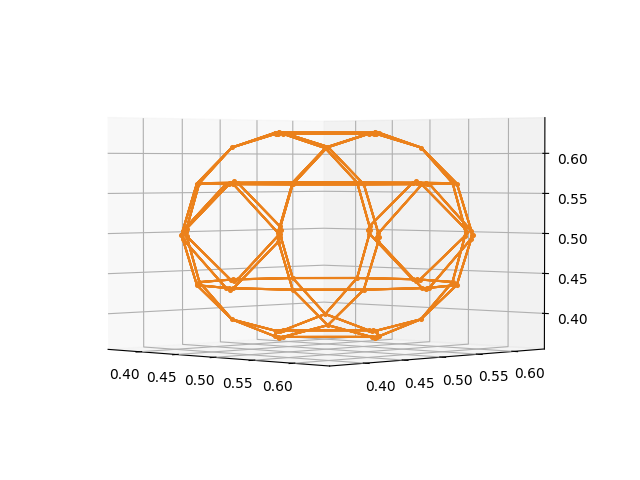

In [26]:
HC = cell_con(cells, dim=3, cdist=1e-14)

### Adding new cases 
New code including 5 and 6 vertices will be more difficult, triangulation might be required, first attempt:

In [30]:
def cell_con(cells, dim=3, cdist=1e-14):
    HC = Complex(dim)
    cell_centres = [] # needed to complete the trianbulatio
    for x_cell in cells:
        cm = np.sum(x_cell, axis=0) / x_cell.shape[0]
        vc = HC.V[tuple(cm)]
        print(x_cell)
        # Case of only 3 points:
        if x_cell.shape[0] == 3:
            V = []
            for v in x_cell:
                V.append(HC.V[tuple(v)])

            print(f'V = {V}')
            #v_c =
            for i1, v in enumerate(V):
                # Optionally connect to centre vertex:
                if 1:
                    v.connect(vc)
                for i2, v in enumerate(V):
                    V[i1].connect(V[i2])

                

        # Case of 4 full points
        if x_cell.shape[0] == 4:
            V = []
            for v in x_cell:
                V.append(HC.V[tuple(v)])
            for i1, v in enumerate(V):
                # Optionally connect to centre vertex:
                if 1:
                    v.connect(vc)
                # Find 2 nearest points (TODO: Optimise later)
                dx = x_cell - v.x_a
                dxn = np.linalg.norm(dx, axis=1)
                con = np.argsort(dxn)[1:3]
                for i2 in con:
                    V[i1].connect(V[i2])
                    
        # Case of 5 and 6 points
        # Here 
        if (x_cell.shape[0] == 5) or (x_cell.shape[0] == 6):
            V = []
            for v in x_cell:
                V.append(HC.V[tuple(v)])
            for i1, v in enumerate(V):
                # Optionally connect to centre vertex:
                if 1:
                    v.connect(vc)
                # Find 2 nearest points (TODO: Optimise later)
                dx = x_cell - v.x_a
                dxn = np.linalg.norm(dx, axis=1)
                con = np.argsort(dxn)[1:3]
                for i2 in con:
                    V[i1].connect(V[i2])
                    
                    
    HC.V.merge_all(cdist=cdist)
    return HC#.plot_complex()


[[0.375      0.43577987 0.5       ]
 [0.37388194 0.4375     0.5       ]
 [0.375      0.4375     0.49514239]]
V = [<ddgclib._vertex.VertexCube object at 0x7fbfda67fa30>, <ddgclib._vertex.VertexCube object at 0x7fbfda67e560>, <ddgclib._vertex.VertexCube object at 0x7fbfda67f7f0>]
[[0.375      0.43577987 0.5       ]
 [0.37388194 0.4375     0.5       ]
 [0.375      0.4375     0.50485761]]
V = [<ddgclib._vertex.VertexCube object at 0x7fbfda67fa30>, <ddgclib._vertex.VertexCube object at 0x7fbfda67e560>, <ddgclib._vertex.VertexCube object at 0x7fbfdac7faf0>]
[[0.375      0.49514239 0.4375    ]
 [0.37388194 0.5        0.4375    ]
 [0.375      0.5        0.43577987]]
V = [<ddgclib._vertex.VertexCube object at 0x7fbfd9edb9a0>, <ddgclib._vertex.VertexCube object at 0x7fbfd9edbbe0>, <ddgclib._vertex.VertexCube object at 0x7fbfd9edb970>]
[[0.375      0.49514239 0.4375    ]
 [0.37388194 0.5        0.4375    ]
 [0.37388194 0.4375     0.5       ]
 [0.35906901 0.5        0.5       ]
 [0.375      0.4375

<IPython.core.display.Javascript object>


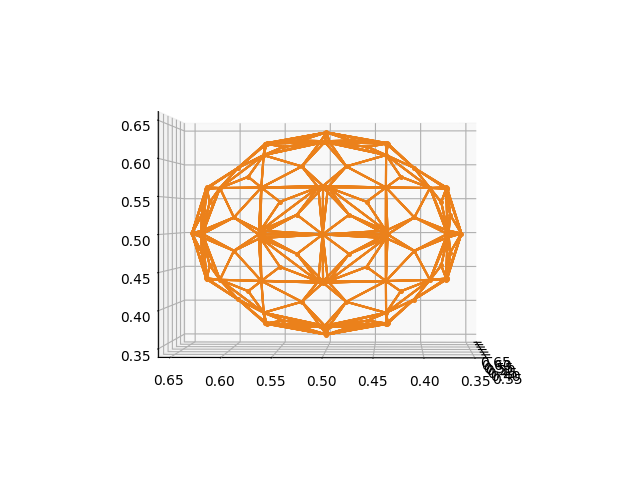

(0.35, 0.65)

In [33]:
HC = cell_con(cells, dim=3, cdist=1e-14)
hcv = copy.copy(HC.V)
for v in hcv:
    if v.x_a[0] > 0.5:
        HC.V.remove(v)
fig, axes, _, _ = HC.plot_complex()
axes.axes.set_xlim3d(left=0.35, right=0.65)

# Attempt 2:


In [43]:
def HC_curvatures_sessile(HC, bV, r, theta_p, printout=False):
    R = r / np.cos(theta_p)
    K_f = (1 / R) ** 2
    H_f = 2 / R  # 2 / R
    HNdA_ij = []
    HN_i = []
    C_ij = []
    K_H_i = []
    HNdA_i_Cij = []
    Theta_i = []

    N_i = []  # Temp cap rise normal

    HNdA_i_cache = {}
    HN_i_cache = {}
    C_ij_cache = {}
    K_H_i_cache = {}
    HNdA_i_Cij_cache = {}
    Theta_i_cache = {}

    for v in HC.V:
        #TODO: REMOVE UNDER NORMAL CONDITIONS:
        if 0:
            if v in bV:
                continue
        N_f0 = v.x_a - np.array([0.5, 0.5, 0.5])  # First approximation
        N_f0 = normalized(N_f0)[0]
        N_i.append(N_f0)
        F, nn = vectorise_vnn(v)
        # Compute discrete curvatures
        c_outd = b_curvatures_hn_ij_c_ij(F, nn, n_i=N_f0)
        # Append lists
        HNdA_ij.append(c_outd['HNdA_i'])
        #HNdA_ij_dot.append(np.sum(np.dot(c_outd['HNdA_ij'], c_outd['n_i'])))
        HN_i.append(c_outd['HN_i'])
        C_ij.append(c_outd['C_ij'])
        K_H_i.append(c_outd['K_H_i'])
        HNdA_i_Cij.append(c_outd['HNdA_ij_Cij'])
        Theta_i.append(c_outd['theta_i'])

        # Append chace
        HNdA_i_cache[v.x] = c_outd['HNdA_i']
        HN_i_cache[v.x] = c_outd['HN_i']
        C_ij_cache[v.x] = c_outd['C_ij']
        K_H_i_cache[v.x] = c_outd['K_H_i']
        HNdA_i_Cij_cache[v.x] = c_outd['HNdA_ij_Cij']
        Theta_i_cache[v.x] = c_outd['theta_i']

    if printout:
        print('.')
        print(f'HNdA_ij = {HNdA_ij}')
        print(f'HN_i = {HN_i}')
        print(f'C_ij = {C_ij}')
        print(f'K_H_i = {K_H_i}')
        print(f'HNdA_i_Cij = {HNdA_i_Cij}')
        print(f'Theta_i= {Theta_i}')
        print(f'np.array(Theta_i) in deg = {np.array(Theta_i) *180/np.pi}')
        print(f'np.array(Theta_i)/np.pi= {np.array(Theta_i) / np.pi}')
        rati = 2 * np.pi /np.array(Theta_i)
        rati = 2 * np.pi / (2 * np.pi - np.array(Theta_i))
        rati =  2 * np.pi / (2 * np.pi - np.array(Theta_i))
        rati =  (np.pi - np.array(Theta_i)/ 2 * np.pi )
        print(f' rati = { rati}')
        print(f'HNdA_i[1] * rati[1]  = {HNdA_ij[1] * rati[1] }')
        print(f'C_ij   = {C_ij }')
        print('.')
        print(f'HNdA_i_Cij = {HNdA_i_Cij}')

        print('-')
        print('Errors:')
        print('-')

        print(f'K_H_i - K_f = {np.array(K_H_i) - K_f}')
        print(f'HN_i  - H_f = {HN_i - H_f}')
        print(f'HNdA_i_Cij  - H_f = {HNdA_i_Cij - H_f}')

        #print(f'np.sum(C_ij) = {np.sum(C_ij)}')

    return (HNdA_ij, HN_i, C_ij, K_H_i, HNdA_i_Cij, Theta_i,
            HNdA_i_cache, HN_i_cache, C_ij_cache, K_H_i_cache, HNdA_i_Cij_cache,
            Theta_i_cache)


In [44]:
r = 1 # Radius of the tube (20 mm)
theta_p = 20 * np.pi/180.0  # Three phase contact angle
r = np.array(r, dtype=np.longdouble)
bV = set([])

(HNdA_ij, HN_i, C_ij, K_H_i, HNdA_i_Cij, Theta_i,
            HNdA_i_cache, HN_i_cache, C_ij_cache, K_H_i_cache, HNdA_i_Cij_cache,
            Theta_i_cache) = HC_curvatures_sessile(HC, bV, r, theta_p, printout=0)
HNdA_ij

[array([6.69986121e-17, 4.35416228e-17, 1.54100704e-17], dtype=float128),
 array([-0.0116846 ,  0.00873285,  0.07468627], dtype=float128),
 array([0.02398871, 0.01216045, 0.02833941], dtype=float128),
 array([ 0.03888888,  0.01667255, -0.09826885], dtype=float128),
 array([ 6.69986121e-17,  4.35416228e-17, -1.54100704e-17], dtype=float128),
 array([ 0.03236608, -0.00563192,  0.03003164], dtype=float128),
 array([6.69986121e-17, 1.54100704e-17, 4.35416228e-17], dtype=float128),
 array([0.00804625, 0.0327908 , 0.0618574 ], dtype=float128),
 array([0.0250097 , 0.02390352, 0.01216045], dtype=float128),
 array([-1.16845998e-02,  4.23042135e-17,  5.13296535e-02], dtype=float128),
 array([-0.00360434,  0.04911881, -0.03408439], dtype=float128),
 array([0.07944114, 0.03417047, 0.01227292], dtype=float128),
 array([-0.00360434,  0.04911881,  0.03408439], dtype=float128),
 array([ 0.03868079, -0.08306125, -0.05884412], dtype=float128),
 array([ 0.01918877,  0.00685357, -0.00411413], dtype=float1

In [53]:
r = 0.15 # Radius of the tube (20 mm)
theta_p = 20 * np.pi/180.0  # Three phase contact angle
r = np.array(r, dtype=np.longdouble)
bV = set([])

(HNda_v_cache, K_H_cache, C_ijk_v_cache, HN_i,  HNdA_ij_dot_hnda_i,
 K_H_2, HNdA_i_Cij) = int_curvatures(HC, bV, r, theta_p, printout=0)

In [54]:
HNda_v_cache

{(0.3746273129049242,
  0.43692662220070644,
  0.4983807955328463): array([[ 0.        ,  0.        ,  0.        ],
        [ 0.00204199, -0.00628319,  0.00887179],
        [ 0.00204199,  0.0031416 , -0.01774358],
        [-0.00408398,  0.0031416 ,  0.00887179]], dtype=float128),
 (0.375,
  0.43577986660211937,
  0.5): array([[ 0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.05017655,  0.14169731],
        [-0.00315669,  0.00485655,  0.        ],
        [-0.00204199,  0.00628319, -0.00887179],
        [ 0.02579334, -0.02042488,  0.01707336],
        [-0.0338576 , -0.00328308,  0.11928868],
        [-0.0338576 , -0.00328308, -0.11928868],
        [-0.        , -0.00271788,  0.00767523],
        [ 0.02579334, -0.02042488, -0.01707336],
        [-0.00204199,  0.00628319,  0.00887179]], dtype=float128),
 (0.37388193871477254,
  0.4375,
  0.5): array([[ 0.        ,  0.        ,  0.        ],
        [-0.00132579,  0.01925335,  0.01368901],
        [ 0.025814  ,  0.        ,

# Comparison with analytical solution

The sphere has a radius of $r = 0.15$ m and therefore a point-wise mean ("fluid mean") curvature of $H = \frac{2}{r}$  and an area of $A = 4\pi r^2$

$$ \int H N dA = \frac{2}{r} \cdot 4\pi r^2 = 8 \pi r  $$

In [55]:
np.sum(HNdA_ij, axis=0), 8*np.pi*r

(array([-0.01886362,  0.21158806,  0.04684751], dtype=float128),
 3.7699111843077515998)

In [59]:
4*np.sum(HNdA_ij), 8*np.pi*r / 3

(0.9582877782887528162, 1.2566370614359171999)

# Attempt 3:


In [61]:
def cell_con(cells, dim=3, cdist=1e-14):
    HC = Complex(dim)
    cell_centres = [] # needed to complete the trianbulatio
    for x_cell in cells:
        cm = np.sum(x_cell, axis=0) / x_cell.shape[0]
        vc = HC.V[tuple(cm)]
        print(x_cell)
        # Case of only 3 points:
        if x_cell.shape[0] == 3:
            V = []
            for v in x_cell:
                V.append(HC.V[tuple(v)])

            print(f'V = {V}')
            #v_c =
            for i1, v in enumerate(V):
                # Optionally connect to centre vertex:
                if 1:
                    v.connect(vc)
                for i2, v in enumerate(V):
                    V[i1].connect(V[i2])

                

        # Case of 4 full points
        if x_cell.shape[0] == 4:
            V = []
            for v in x_cell:
                V.append(HC.V[tuple(v)])
            for i1, v in enumerate(V):
                # Optionally connect to centre vertex:
                if 1:
                    v.connect(vc)
                # Find 2 nearest points (TODO: Optimise later)
                dx = x_cell - v.x_a
                dxn = np.linalg.norm(dx, axis=1)
                con = np.argsort(dxn)[1:3]
                for i2 in con:
                    V[i1].connect(V[i2])
                    
        # Case of 5 and 6 points
        # Here the triangle inequality is no longer valid?
        if (x_cell.shape[0] == 5) or (x_cell.shape[0] == 6):
            V = []
            for v in x_cell:
                V.append(HC.V[tuple(v)])
            for i1, v in enumerate(V):
                # Optionally connect to centre vertex:
                if 1:
                    v.connect(vc)
                # Find 2 nearest points (TODO: Optimise later)
                dx = x_cell - v.x_a
                dxn = np.linalg.norm(dx, axis=1)
                con = np.argsort(dxn)[1:3]
                for i2 in con:
                    V[i1].connect(V[i2])
                    
                    
    HC.V.merge_all(cdist=cdist)
    return HC#.plot_complex()


[[0.375      0.43577987 0.5       ]
 [0.37388194 0.4375     0.5       ]
 [0.375      0.4375     0.49514239]]
V = [<ddgclib._vertex.VertexCube object at 0x7fbfd9e846a0>, <ddgclib._vertex.VertexCube object at 0x7fbfd9e86500>, <ddgclib._vertex.VertexCube object at 0x7fbfd9f2fee0>]
[[0.375      0.43577987 0.5       ]
 [0.37388194 0.4375     0.5       ]
 [0.375      0.4375     0.50485761]]
V = [<ddgclib._vertex.VertexCube object at 0x7fbfd9e846a0>, <ddgclib._vertex.VertexCube object at 0x7fbfd9e86500>, <ddgclib._vertex.VertexCube object at 0x7fbfd9f2c6a0>]
[[0.375      0.49514239 0.4375    ]
 [0.37388194 0.5        0.4375    ]
 [0.375      0.5        0.43577987]]
V = [<ddgclib._vertex.VertexCube object at 0x7fbfd9f2ebf0>, <ddgclib._vertex.VertexCube object at 0x7fbfd9eda620>, <ddgclib._vertex.VertexCube object at 0x7fbfd9edb5e0>]
[[0.375      0.49514239 0.4375    ]
 [0.37388194 0.5        0.4375    ]
 [0.37388194 0.4375     0.5       ]
 [0.35906901 0.5        0.5       ]
 [0.375      0.4375

<IPython.core.display.Javascript object>


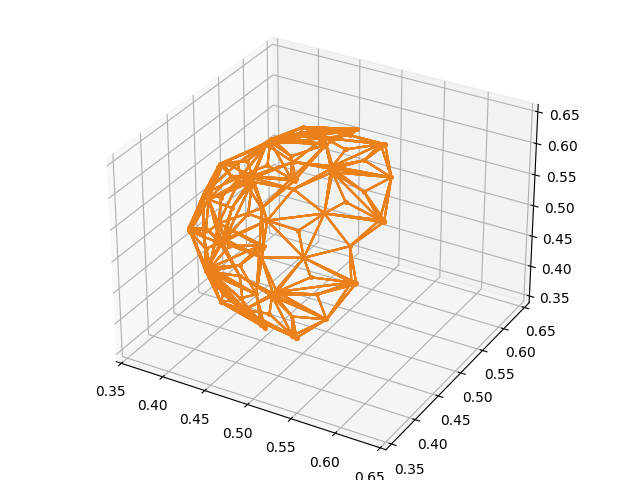

(0.35, 0.65)

In [62]:
HC = cell_con(cells, dim=3, cdist=1e-14)
hcv = copy.copy(HC.V)
for v in hcv:
    if v.x_a[0] > 0.5:
        HC.V.remove(v)
fig, axes, _, _ = HC.plot_complex()
axes.axes.set_xlim3d(left=0.35, right=0.65)

In [77]:
r = 0.15 # Radius of the tube (20 mm)
theta_p = 20 * np.pi/180.0  # Three phase contact angle
r = np.array(r, dtype=np.longdouble)
bV = set([])
(HNdA_ij, HN_i, C_ij, K_H_i, HNdA_i_Cij, Theta_i,
            HNdA_i_cache, HN_i_cache, C_ij_cache, K_H_i_cache, HNdA_i_Cij_cache,
            Theta_i_cache) = HC_curvatures_sessile(HC, bV, r, theta_p, printout=0)
HNdA_ij

[array([-0.01165546, -0.05646804,  0.06784001], dtype=float128),
 array([ 0.03550947, -0.00804893, -0.01065854], dtype=float128),
 array([0.04413185, 0.00666992, 0.0468586 ], dtype=float128),
 array([ 0.00444636,  0.03005626, -0.02326132], dtype=float128),
 array([0.02455148, 0.05134485, 0.18617584], dtype=float128),
 array([ 0.06090982, -0.33328692,  0.26242929], dtype=float128),
 array([-0.00841148, -0.01163959,  0.02324165], dtype=float128),
 array([-0.05369451, -0.05761486,  0.04544702], dtype=float128),
 array([0.26513964, 0.26618788, 0.26981843], dtype=float128),
 array([0.00926037, 0.0764498 , 0.00974177], dtype=float128),
 array([0.00386836, 0.01662044, 0.00663776], dtype=float128),
 array([-0.00898072,  0.04692888, -0.07397779], dtype=float128),
 array([-0.03028598,  0.00142382, -0.02903525], dtype=float128),
 array([-0.02516946, -0.00212308, -0.01205039], dtype=float128),
 array([-0.00666992,  0.04413185,  0.0468586 ], dtype=float128),
 array([ 0.0856931 , -0.00762709, -0.042

In [78]:
np.sum(HNdA_ij, axis=0), 8*np.pi*r

(array([0.72715232, 0.7022318 , 0.19806352], dtype=float128),
 3.7699111843077515998)

In [80]:
2*np.sum(HNdA_ij), 8*np.pi*r

(3.2548952791363144317, 3.7699111843077515998)

# Check comparison with Qhull


In [71]:
X = []
HC = Complex(3)
for c in corners_and_intersections:
    cm = np.sum(c['Intersections'], axis=0) / c['Intersections'].shape[0]
    X.append(cm)
    for xi in c['Intersections']:
        X.append(xi)
X = np.array(X)

In [72]:
import scipy.spatial 
tri = scipy.spatial.Delaunay(X)

In [69]:
HC.vf_to_vv(tri.points, tri.simplices)


<IPython.core.display.Javascript object>


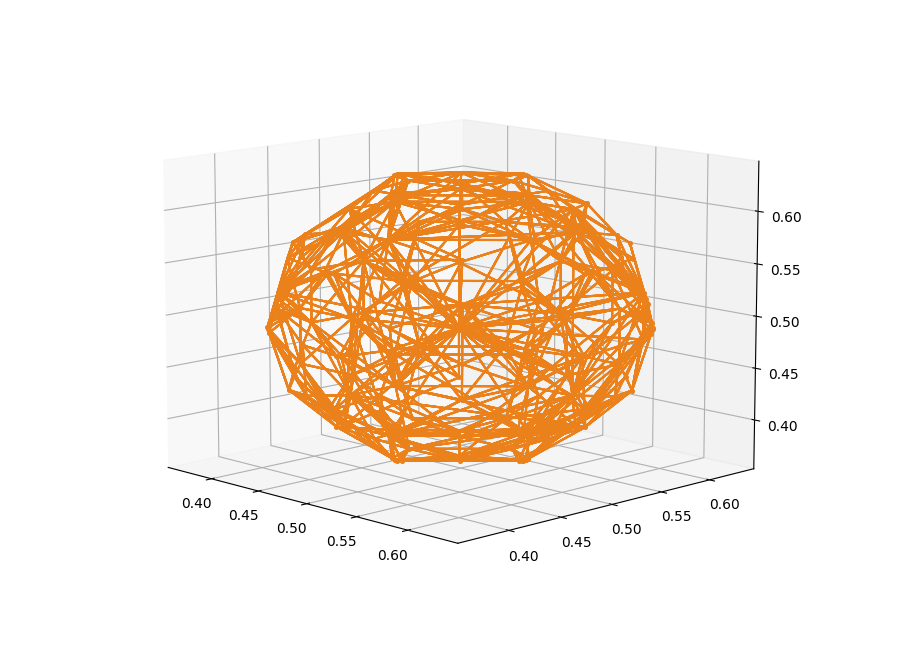

(<Figure size 640x480 with 1 Axes>, <Axes3D:>, None, None)

In [70]:
HC.plot_complex()

<IPython.core.display.Javascript object>


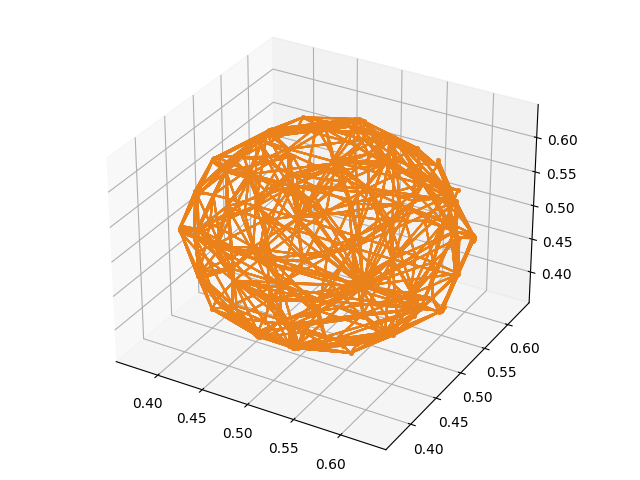

(<Figure size 640x480 with 1 Axes>, <Axes3D:>, None, None)

In [81]:
X = []
HC = Complex(3)
for c in corners_and_intersections:
    cm = np.sum(c['Intersections'], axis=0) / c['Intersections'].shape[0]
    X.append(cm)
    for xi in c['Intersections']:
        X.append(xi)
X = np.array(X)
tri = scipy.spatial.Delaunay(X)
dV = HC.boundary_d(HC.V)
HC.vf_to_vv(tri.points, tri.simplices)
HC.plot_complex()

In [82]:
r = 0.15 # Radius of the tube (20 mm)
theta_p = 20 * np.pi/180.0  # Three phase contact angle
r = np.array(r, dtype=np.longdouble)
bV = set([])

(HNdA_ij, HN_i, C_ij, K_H_i, HNdA_i_Cij, Theta_i,
            HNdA_i_cache, HN_i_cache, C_ij_cache, K_H_i_cache, HNdA_i_Cij_cache,
            Theta_i_cache) = HC_curvatures_sessile(HC, bV, r, theta_p, printout=0)
HNdA_ij

[array([-0.01165546, -0.05646804,  0.06784001], dtype=float128),
 array([ 0.03550947, -0.00804893, -0.01065854], dtype=float128),
 array([0.04413185, 0.00666992, 0.0468586 ], dtype=float128),
 array([ 0.00444636,  0.03005626, -0.02326132], dtype=float128),
 array([0.02455148, 0.05134485, 0.18617584], dtype=float128),
 array([ 0.06090982, -0.33328692,  0.26242929], dtype=float128),
 array([-0.00841148, -0.01163959,  0.02324165], dtype=float128),
 array([-0.05369451, -0.05761486,  0.04544702], dtype=float128),
 array([0.26513964, 0.26618788, 0.26981843], dtype=float128),
 array([0.00926037, 0.0764498 , 0.00974177], dtype=float128),
 array([0.00386836, 0.01662044, 0.00663776], dtype=float128),
 array([-0.00898072,  0.04692888, -0.07397779], dtype=float128),
 array([-0.03028598,  0.00142382, -0.02903525], dtype=float128),
 array([-0.02516946, -0.00212308, -0.01205039], dtype=float128),
 array([-0.00666992,  0.04413185,  0.0468586 ], dtype=float128),
 array([ 0.0856931 , -0.00762709, -0.042

In [83]:
np.sum(HNdA_ij, axis=0), 8*np.pi*r

(array([0.72715232, 0.7022318 , 0.19806352], dtype=float128),
 3.7699111843077515998)

In [85]:
np.sum(HNdA_ij), 4*np.pi*r

(1.6274476395681572159, 1.8849555921538757999)